In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [4]:
data=pd.read_csv("shipments.csv")

In [5]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data.describe(include="all")

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [8]:
data.shape

(10999, 12)

# Renaming the Columns

In [9]:
data.columns = map(str.lower, data.columns) #Converting all Column names to Lowercase

In [10]:
data

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [11]:
data2 = data.rename({'reached.on.time_y.n': 'reached_on_time'}, axis=1)

In [12]:
data2

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Checking For Null Values

In [13]:
data2.isnull().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached_on_time        0
dtype: int64

# Looking at the distribution of Target variable

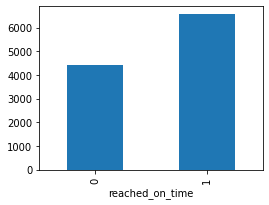

In [14]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=data2.groupby('reached_on_time').size()
GroupedData.plot(kind='bar', figsize=(4,3))



# Duplicate Values

In [15]:
data2[data2.duplicated()] #No Duplicate Values

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time


In [16]:
UselessColumns = ['id']
data2 = data2.drop(UselessColumns,axis=1)
data2.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      10999 non-null  object
 1   mode_of_shipment     10999 non-null  object
 2   customer_care_calls  10999 non-null  int64 
 3   customer_rating      10999 non-null  int64 
 4   cost_of_the_product  10999 non-null  int64 
 5   prior_purchases      10999 non-null  int64 
 6   product_importance   10999 non-null  object
 7   gender               10999 non-null  object
 8   discount_offered     10999 non-null  int64 
 9   weight_in_gms        10999 non-null  int64 
 10  reached_on_time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


# Outlier Detection and Removal

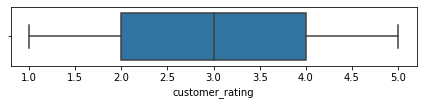

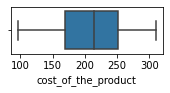

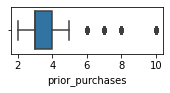

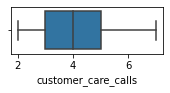

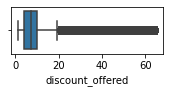

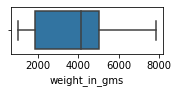

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(4,2,1)
sns.boxplot(data2['customer_rating'])
plt.show()
plt.subplot(4,2,2)
sns.boxplot(data2['cost_of_the_product'])
plt.show()
plt.subplot(4,2,3)
sns.boxplot(data2['prior_purchases'])
plt.show()
plt.subplot(4,2,4)
sns.boxplot(data2['customer_care_calls'])
plt.show()
plt.subplot(4,2,5)
sns.boxplot(data2['discount_offered'])
plt.show()
plt.subplot(4,2,6)
sns.boxplot(data2['weight_in_gms'])
plt.show()







In [19]:
#Outlier Removal using Z Score Technique
percentile25 = data2['prior_purchases'].quantile(0.25)
percentile75 = data2['prior_purchases'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr 
lower_limit = percentile25 - 1.5 * iqr
data2['prior_purchases'] = np.where(data2['prior_purchases'] > upper_limit,upper_limit,np.where(data2['prior_purchases'] < lower_limit,lower_limit, data2['prior_purchases']))


# After Removal of Outliers

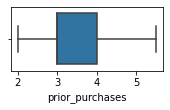

In [20]:
plt.subplot(3,2,1)
sns.boxplot(data2['prior_purchases'])
plt.show()

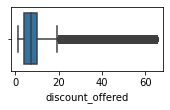

In [21]:
plt.subplot(3,2,2)
sns.boxplot(data2['discount_offered'])
plt.show()

# Visualisation

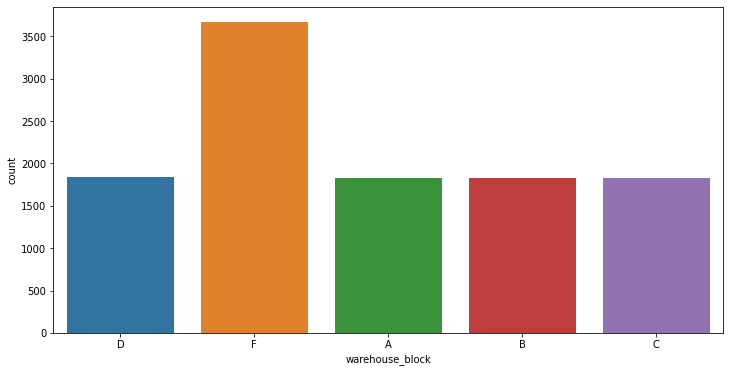

In [22]:
plt.figure(figsize=(12,6))
x=data2['warehouse_block']
sns.countplot(x=x)

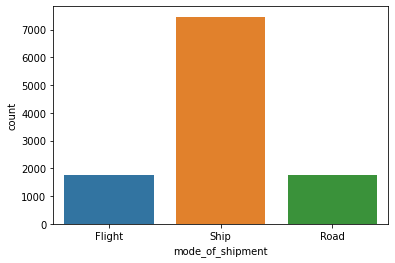

In [23]:
x=data2['mode_of_shipment']
sns.countplot(x=x)

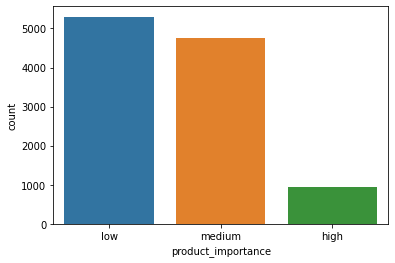

In [24]:
x=data2['product_importance']
sns.countplot(x=x)

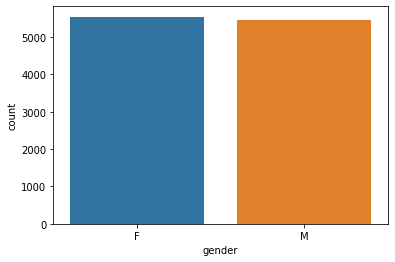

In [25]:
x=data2['gender']
sns.countplot(x=x)

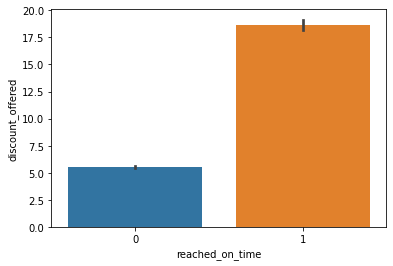

In [26]:
sns.barplot(data=data2, x="reached_on_time", y="discount_offered")

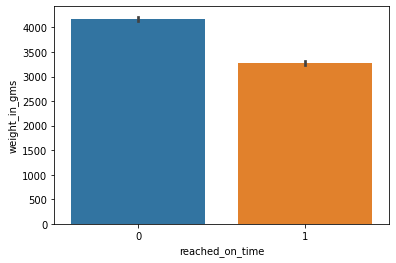

In [27]:
sns.barplot(data=data2, x="reached_on_time", y="weight_in_gms")

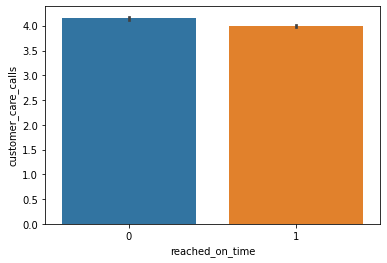

In [28]:
sns.barplot(data=data2, x="reached_on_time", y="customer_care_calls")

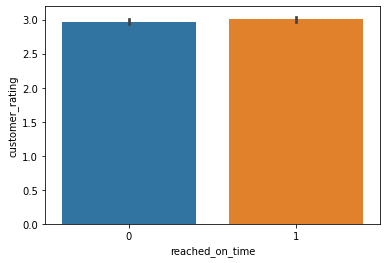

In [29]:
sns.barplot(data=data2, x="reached_on_time", y="customer_rating")

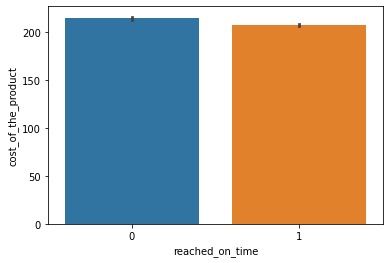

In [30]:
sns.barplot(data=data2, x="reached_on_time", y="cost_of_the_product")

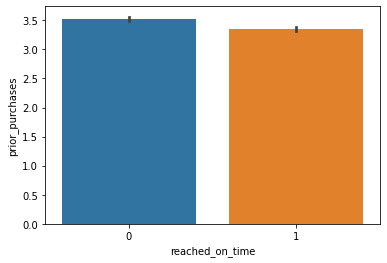

In [31]:
sns.barplot(data=data2, x="reached_on_time", y="prior_purchases")

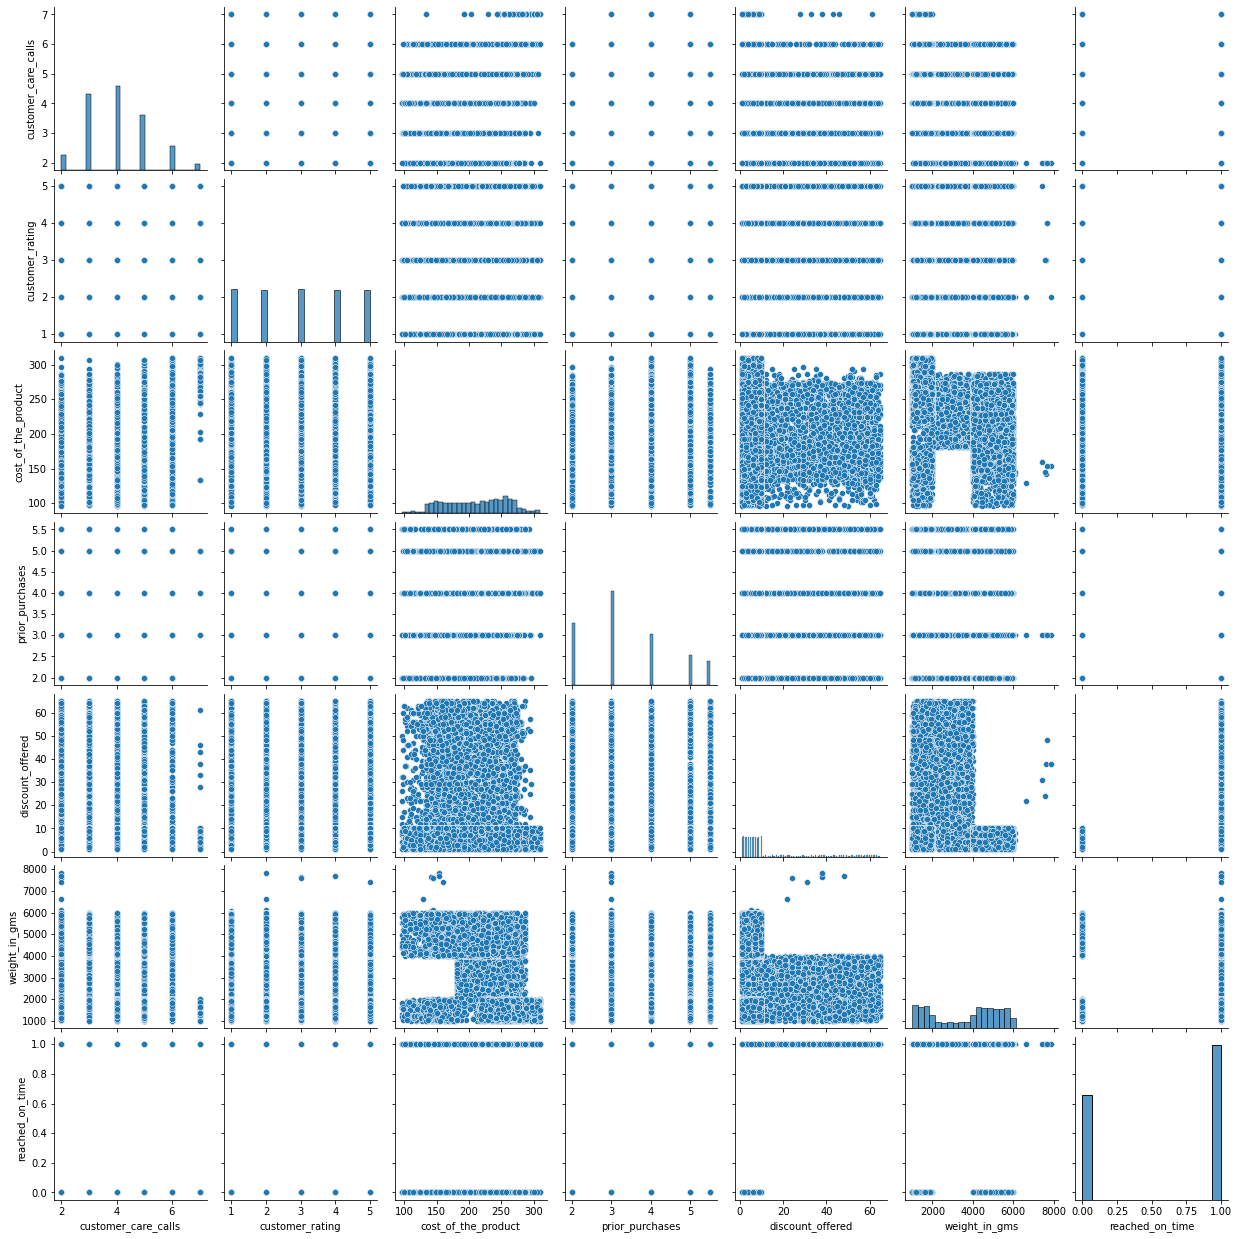

In [32]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data2)

In [33]:
corr = data2.corr()
corr

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time
customer_care_calls,1.000000,0.012209,0.323182,0.264801,-0.130750,-0.276615,-0.067126
customer_rating,0.012209,1.000000,0.009270,0.008450,-0.003124,-0.001897,0.013119
cost_of_the_product,0.323182,0.009270,1.000000,0.180123,-0.138312,-0.132604,-0.073587
prior_purchases,0.264801,0.008450,0.180123,1.000000,-0.112651,-0.253856,-0.074934
discount_offered,-0.130750,-0.003124,-0.138312,-0.112651,1.000000,-0.376067,0.397108
weight_in_gms,-0.276615,-0.001897,-0.132604,-0.253856,-0.376067,1.000000,-0.268793
reached_on_time,-0.067126,0.013119,-0.073587,-0.074934,0.397108,-0.268793,1.000000


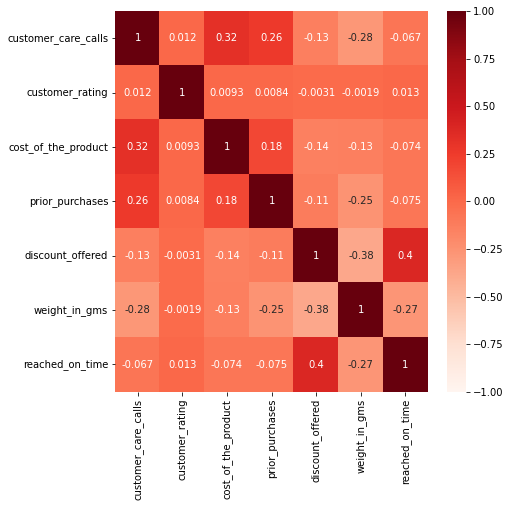

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap=plt.cm.Reds, annot=True, vmax=1, vmin=-1)
plt.show()

In [35]:
#from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
#le = LabelEncoder()

#objList = data2.select_dtypes(include = "object").columns
#print (objList)

In [36]:
#for feat in objList:
    #data2[feat] = le.fit_transform(data2[feat].astype(str))

In [37]:
data3=pd.get_dummies(data2)
#finaldata['reached_on_time']=data2['reached_on_time']

In [38]:
data3

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium,gender_F,gender_M
0,4,2,177,3.0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2.0,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4.0,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4.0,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3.0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5.0,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5.0,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5.0,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,5.5,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [39]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_care_calls        10999 non-null  int64  
 1   customer_rating            10999 non-null  int64  
 2   cost_of_the_product        10999 non-null  int64  
 3   prior_purchases            10999 non-null  float64
 4   discount_offered           10999 non-null  int64  
 5   weight_in_gms              10999 non-null  int64  
 6   reached_on_time            10999 non-null  int64  
 7   warehouse_block_A          10999 non-null  uint8  
 8   warehouse_block_B          10999 non-null  uint8  
 9   warehouse_block_C          10999 non-null  uint8  
 10  warehouse_block_D          10999 non-null  uint8  
 11  warehouse_block_F          10999 non-null  uint8  
 12  mode_of_shipment_Flight    10999 non-null  uint8  
 13  mode_of_shipment_Road      10999 non-null  uin

In [40]:
time= data3['reached_on_time']
data3 = data3.drop(columns=['reached_on_time'])


In [41]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_care_calls        10999 non-null  int64  
 1   customer_rating            10999 non-null  int64  
 2   cost_of_the_product        10999 non-null  int64  
 3   prior_purchases            10999 non-null  float64
 4   discount_offered           10999 non-null  int64  
 5   weight_in_gms              10999 non-null  int64  
 6   warehouse_block_A          10999 non-null  uint8  
 7   warehouse_block_B          10999 non-null  uint8  
 8   warehouse_block_C          10999 non-null  uint8  
 9   warehouse_block_D          10999 non-null  uint8  
 10  warehouse_block_F          10999 non-null  uint8  
 11  mode_of_shipment_Flight    10999 non-null  uint8  
 12  mode_of_shipment_Road      10999 non-null  uint8  
 13  mode_of_shipment_Ship      10999 non-null  uin

In [42]:
data3.insert(loc=19, column='reached_on_time', value=time)

In [43]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_care_calls        10999 non-null  int64  
 1   customer_rating            10999 non-null  int64  
 2   cost_of_the_product        10999 non-null  int64  
 3   prior_purchases            10999 non-null  float64
 4   discount_offered           10999 non-null  int64  
 5   weight_in_gms              10999 non-null  int64  
 6   warehouse_block_A          10999 non-null  uint8  
 7   warehouse_block_B          10999 non-null  uint8  
 8   warehouse_block_C          10999 non-null  uint8  
 9   warehouse_block_D          10999 non-null  uint8  
 10  warehouse_block_F          10999 non-null  uint8  
 11  mode_of_shipment_Flight    10999 non-null  uint8  
 12  mode_of_shipment_Road      10999 non-null  uint8  
 13  mode_of_shipment_Ship      10999 non-null  uin

In [44]:
#Importing libraries
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [45]:
#Rescaling
#scaler = MinMaxScaler(feature_range=(0,1))
#rescaleData = scaler.fit_transform(finaldata)
#rescaleData=pd.DataFrame(rescaleData,index=finaldata.index,columns=finaldata.columns)
#print(rescaleData)

### Speeding up EDA process

In [46]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_care_calls        10999 non-null  int64  
 1   customer_rating            10999 non-null  int64  
 2   cost_of_the_product        10999 non-null  int64  
 3   prior_purchases            10999 non-null  float64
 4   discount_offered           10999 non-null  int64  
 5   weight_in_gms              10999 non-null  int64  
 6   warehouse_block_A          10999 non-null  uint8  
 7   warehouse_block_B          10999 non-null  uint8  
 8   warehouse_block_C          10999 non-null  uint8  
 9   warehouse_block_D          10999 non-null  uint8  
 10  warehouse_block_F          10999 non-null  uint8  
 11  mode_of_shipment_Flight    10999 non-null  uint8  
 12  mode_of_shipment_Road      10999 non-null  uint8  
 13  mode_of_shipment_Ship      10999 non-null  uin

In [47]:
X=data3.iloc[:,0:18]
y=data3.iloc[:,-1]

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Names','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                        Names          Score
5               weight_in_gms  584786.397638
4            discount_offered   34058.262984
2         cost_of_the_product     654.513914
3             prior_purchases      23.328453
0         customer_care_calls      15.925914
14    product_importance_high      11.106674
1             customer_rating       1.264718
6           warehouse_block_A       0.795620
16  product_importance_medium       0.769316
12      mode_of_shipment_Road       0.543731


[0.07751161 0.08283847 0.15420873 0.07014208 0.23878392 0.22493467
 0.0116204  0.01201121 0.01217735 0.01129143 0.01521785 0.01009935
 0.01051233 0.01289128 0.00499172 0.01055047 0.01049093 0.02972619]


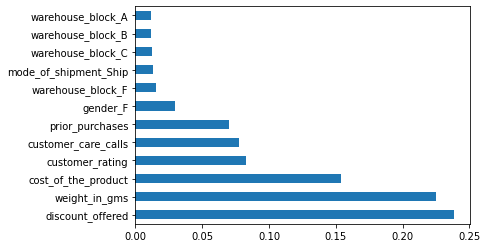

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [50]:
TargetVariable='reached_on_time'
Predictors=['weight_in_gms', 'cost_of_the_product','discount_offered','customer_care_calls','customer_rating','prior_purchases']

X=data3[Predictors].values
y=data3[TargetVariable].values

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

In [52]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Logistic Regression


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

model = LogisticRegression()

LOG=model.fit(X_train,y_train)
prediction=LOG.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

LOGaccu=((743+1314)/(743+560+683+1314))*100
print('COnfusion matric accuracy = ', LOGaccu)

LR_train_accu=model.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(LR_train_accu,2))

LR_test_accu=model.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(LR_test_accu,2))





              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1303
           1       0.70      0.66      0.68      1997

    accuracy                           0.62      3300
   macro avg       0.61      0.61      0.61      3300
weighted avg       0.63      0.62      0.63      3300

[[ 743  560]
 [ 683 1314]]
COnfusion matric accuracy =  62.33333333333333
the Train Accuracy(Score) of the model 0.65
the Test Accuracy(Score) of the model 0.62


In [67]:
# K fold

In [68]:
from sklearn.model_selection import cross_val_score,KFold

In [81]:
kf=KFold(n_splits=10)

In [79]:
score=cross_val_score(LOG,X,y,cv=kf)

In [80]:
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.97820163 0.96730245 0.97275204 0.95912807 0.96730245 0.96185286
 0.98637602 0.98637602 0.75476839 0.54495913 0.5013624  0.47956403
 0.5013624  0.51226158 0.52861035 0.48773842 0.5013624  0.48228883
 0.48228883 0.51092896 0.50819672 0.49180328 0.5273224  0.5
 0.47540984 0.56830601 0.4726776  0.52185792 0.50819672 0.47540984]
Average Cross Validation score :0.6371989200081395


# DecisionTreeClassifier



In [84]:
from sklearn import tree
dtg = tree.DecisionTreeClassifier(criterion='gini')

# Creating the model on Training Data
DTree=dtg.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

Dtreeaccu=((724+1396)/(724+579+601+1396))*100
print('COnfusion matric accuracy = ', Dtreeaccu)

DT_train_accu=dtg.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(DT_train_accu,2))

DT_test_accu=dtg.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(DT_test_accu,2))

# K fold
scoreDT=cross_val_score(DTree,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreDT))
print("Average Cross Validation score :{}".format(scoreDT.mean()))


              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1303
           1       0.70      0.70      0.70      1997

    accuracy                           0.64      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.64      0.64      3300

[[ 708  595]
 [ 596 1401]]
COnfusion matric accuracy =  64.24242424242425
the Train Accuracy(Score) of the model 1.0
the Test Accuracy(Score) of the model 0.64
Cross Validation Scores are [0.99272727 0.99272727 0.91363636 0.5        0.50545455 0.52
 0.49       0.49636364 0.49818182 0.52502275]
Average Cross Validation score :0.6434113657043593


# RandomForest


In [85]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)

# Creating the model on Training Data
RF=rf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

RFaccu=((889+1266)/(889+414+731+1266))*100
print('COnfusion matric accuracy = ', RFaccu)

RF_train_accu=rf.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(RF_train_accu,2))

RF_test_accu=rf.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(RF_test_accu,2))

scoreRF=cross_val_score(RF,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreRF))
print("Average Cross Validation score :{}".format(scoreRF.mean()))






              precision    recall  f1-score   support

           0       0.54      0.71      0.62      1303
           1       0.76      0.61      0.68      1997

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.68      0.65      0.65      3300

[[ 923  380]
 [ 772 1225]]
COnfusion matric accuracy =  65.30303030303031
the Train Accuracy(Score) of the model 0.98
the Test Accuracy(Score) of the model 0.65
Cross Validation Scores are [0.99727273 0.98818182 0.91545455 0.50090909 0.50454545 0.51272727
 0.51636364 0.50454545 0.55909091 0.51228389]
Average Cross Validation score :0.6511374803540407


# Adaboost 


In [86]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()


# Creating the model on Training Data
AB=ada.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

ADBaccu=((1048+1140)/(1048+255+857+1140))*100
print('COnfusion matric accuracy = ', ADBaccu)

AD_train_accu=ada.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(AD_train_accu,2))

AD_test_accu=ada.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(AD_test_accu,2))

scoreAB=cross_val_score(AB,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreAB))
print("Average Cross Validation score :{}".format(scoreAB.mean()))






              precision    recall  f1-score   support

           0       0.55      0.80      0.65      1303
           1       0.82      0.57      0.67      1997

    accuracy                           0.66      3300
   macro avg       0.68      0.69      0.66      3300
weighted avg       0.71      0.66      0.66      3300

[[1048  255]
 [ 857 1140]]
COnfusion matric accuracy =  66.30303030303031
the Train Accuracy(Score) of the model 0.69
the Test Accuracy(Score) of the model 0.66
Cross Validation Scores are [0.99818182 0.99272727 0.92545455 0.57090909 0.53818182 0.52818182
 0.56909091 0.55818182 0.53454545 0.51865332]
Average Cross Validation score :0.6734107866655638


# GradientBoost

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()


# Creating the model on Training Data
GB=gbc.fit(X_train,y_train)
prediction=GB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

GB_train_accu=gbc.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(GB_train_accu,2))

GB_test_accu=gbc.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(GB_test_accu,2))

scoreGB=cross_val_score(GB,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreGB))
print("Average Cross Validation score :{}".format(scoreGB.mean()))


              precision    recall  f1-score   support

           0       0.55      0.89      0.68      1303
           1       0.88      0.52      0.66      1997

    accuracy                           0.67      3300
   macro avg       0.71      0.71      0.67      3300
weighted avg       0.75      0.67      0.66      3300

[[1157  146]
 [ 952 1045]]
the Train Accuracy(Score) of the model 0.72
the Test Accuracy(Score) of the model 0.67
Cross Validation Scores are [0.99818182 0.99909091 0.93       0.56636364 0.54272727 0.53272727
 0.56454545 0.56636364 0.55090909 0.54686078]
Average Cross Validation score :0.6797769873438664


# XGBOOST


In [88]:
from xgboost import XGBClassifier
xgb=XGBClassifier()


# Creating the model on Training Data
XGB=xgb.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

XGBaccu=((1169+1024)/(1169+134+973+1024))*100
print('COnfusion matric accuracy = ', XGBaccu)

XGB_train_accu=xgb.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(XGB_train_accu,2))

XGB_test_accu=xgb.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(XGB_test_accu,2))

scoreXGB=cross_val_score(XGB,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreXGB))
print("Average Cross Validation score :{}".format(scoreXGB.mean()))




              precision    recall  f1-score   support

           0       0.55      0.90      0.68      1303
           1       0.88      0.51      0.65      1997

    accuracy                           0.66      3300
   macro avg       0.72      0.70      0.66      3300
weighted avg       0.75      0.66      0.66      3300

[[1169  134]
 [ 973 1024]]
COnfusion matric accuracy =  66.45454545454545
the Train Accuracy(Score) of the model 0.71
the Test Accuracy(Score) of the model 0.66
Cross Validation Scores are [0.99818182 0.99909091 0.93181818 0.57727273 0.54272727 0.53272727
 0.56727273 0.57090909 0.56727273 0.53685168]
Average Cross Validation score :0.6824124410621227


# Support Vector Machines(SVM)


In [89]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')

# Creating the model on Training Data
SVM=svc.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

SVM_train_accu=svc.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(SVM_train_accu,2))

SVM_test_accu=svc.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(SVM_test_accu,2))

scoreSVM=cross_val_score(SVM,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreSVM))
print("Average Cross Validation score :{}".format(scoreSVM.mean()*100))



              precision    recall  f1-score   support

           0       0.54      0.89      0.67      1303
           1       0.87      0.50      0.64      1997

    accuracy                           0.66      3300
   macro avg       0.71      0.70      0.65      3300
weighted avg       0.74      0.66      0.65      3300

[[1157  146]
 [ 992 1005]]
the Train Accuracy(Score) of the model 0.7
the Test Accuracy(Score) of the model 0.66
Cross Validation Scores are [0.96909091 0.96545455 0.91454545 0.55636364 0.55090909 0.53727273
 0.55363636 0.54636364 0.55272727 0.55323021]
Average Cross Validation score :66.99593845644802


# Naive Bayes


In [90]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

NB=gb.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

NB_train_accu=gb.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(NB_train_accu,2))

NB_test_accu=gb.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(NB_test_accu,2))

scoreNB=cross_val_score(NB,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreNB))
print("Average Cross Validation score :{}".format(scoreNB.mean()*100))


              precision    recall  f1-score   support

           0       0.52      0.98      0.68      1303
           1       0.97      0.41      0.58      1997

    accuracy                           0.64      3300
   macro avg       0.75      0.70      0.63      3300
weighted avg       0.79      0.64      0.62      3300

[[1279   24]
 [1174  823]]
the Train Accuracy(Score) of the model 0.66
the Test Accuracy(Score) of the model 0.64
Cross Validation Scores are [0.86272727 0.86090909 0.81909091 0.57454545 0.56363636 0.54181818
 0.56181818 0.55545455 0.58454545 0.56596906]
Average Cross Validation score :64.90514517329804


# KNN

In [61]:
import numpy
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [63]:
print(f"The best score is: {grid.best_score_}\nThe best value for K is: {grid.best_params_}")

The best score is: 0.6342204721154244
The best value for K is: {'n_neighbors': 2}


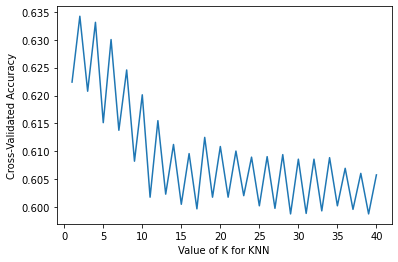

In [64]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 41)
k_scores = []
# use iteration to calculator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)


# Creating the model on Training Data
KNN=knn.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

KNN_train_accu=knn.score(X_train, y_train)
print('the Train Accuracy(Score) of the model', round(KNN_train_accu,2))

KNN_test_accu=knn.score(X_test, y_test)
print('the Test Accuracy(Score) of the model', round(KNN_test_accu,2))

scoreKNN=cross_val_score(KNN,X,y,cv=kf)
print("Cross Validation Scores are {}".format(scoreKNN))
print("Average Cross Validation score :{}".format(scoreKNN.mean()*100))


              precision    recall  f1-score   support

           0       0.53      0.79      0.63      1303
           1       0.80      0.54      0.64      1997

    accuracy                           0.64      3300
   macro avg       0.66      0.67      0.64      3300
weighted avg       0.69      0.64      0.64      3300

[[1031  272]
 [ 917 1080]]
the Train Accuracy(Score) of the model 0.82
the Test Accuracy(Score) of the model 0.64
Cross Validation Scores are [0.92363636 0.90818182 0.87636364 0.53818182 0.54727273 0.55272727
 0.53727273 0.55272727 0.52636364 0.53867152]
Average Cross Validation score :65.01398792290512


In [66]:
data = {'Names of Algorithms': ['Logistic Regression', 'Decision Tree', 'Random Forest','Adaboost','GradientBoost','XGBoost','SVM','Naive Bayes','KNN'],
        'Train_Accuracy': [LR_train_accu*100, DT_train_accu*100, RF_train_accu*100,AD_train_accu*100,GB_train_accu*100,XGB_train_accu*100,SVM_train_accu*100,NB_train_accu*100,KNN_train_accu*100],
        'Test_Accuracy': [LR_test_accu*100, DT_test_accu*100,RF_test_accu*100,AD_test_accu*100,GB_test_accu*100,XGB_test_accu*100,SVM_test_accu*100,NB_test_accu*100,KNN_test_accu*100],
        }

df = pd.DataFrame(data)

print (df)

   Names of Algorithms  Train_Accuracy  Test_Accuracy
0  Logistic Regression       65.138330      62.333333
1        Decision Tree      100.000000      64.060606
2        Random Forest       98.038706      64.848485
3             Adaboost       69.346668      66.303030
4        GradientBoost       71.983374      66.727273
5              XGBoost       71.022211      66.454545
6                  SVM       69.632420      65.515152
7          Naive Bayes       65.813742      63.696970
8                  KNN       82.153526      63.969697


# K Fold Cross Validation scores for different models

In [97]:
dataknn = {'Names of Algorithms': ['Logistic Regression', 'Decision Tree', 'Random Forest','Adaboost','GradientBoost','XGBoost','SVM','Naive Bayes','KNN'],
           'K fold Score': [score.mean()*100, scoreDT.mean()*100, scoreRF.mean()*100,scoreAB.mean()*100,scoreGB.mean()*100,scoreXGB.mean()*100,scoreSVM.mean()*100,scoreNB.mean()*100,scoreKNN.mean()*100]
            }

In [98]:
dfKF=pd.DataFrame(dataknn)

In [99]:
dfKF

,Names of Algorithms,K fold Score
0,Logistic Regression,63.719892
1,Decision Tree,64.341137
2,Random Forest,65.113748
3,Adaboost,67.341079
4,GradientBoost,67.977699
5,XGBoost,68.241244
6,SVM,66.995938
7,Naive Bayes,64.905145
8,KNN,65.013988


# DEPLOYMENT

In [103]:
#import libraries
import numpy as np
from flask import Flask, render_template,request
import pickle#Initialize the flask App


In [104]:
pickle.dump(XGB, open('model.pkl','wb'))

In [105]:
app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

In [106]:
#default page of our web-app
@app.route('/')
def home():
    return render_template('index.html')

In [107]:
#To use the predict button in our web-app
@app.route('/predict',methods=['POST'])
def predict():
    #For rendering results on HTML GUI
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    output = round(prediction[0], 2) 
    return render_template('index.html', prediction_text='Reached on time :{}'.format(output))